In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import gensim

In [2]:
df = pd.read_json("../data/processed_data/fixed_processed_after_NEMO.json")
dti = pd.to_datetime(df[["year", "month", "day", "hour"]], errors="coerce")
df["time"] = dti
df

,paragraph,hour,day,month,year,filename,time,lemmatized_text,nemo_status
0,"תם שימוע ראש הממשלה, בינימין נתניהו: לאחר עשר ...",21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00,תם שימוע ראש ה ממשלה _ ב ינימין נתניהו _ לאחר ...,True
1,"גבר בן שלושים נורה ברחוב העלייה בלוד, מצבו קשה...",21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00,גבר בן שלושים נורה ב רחוב ה עלייה ב לוד _ מצב ...,True
2,"הרמטכ""ל, רב אלוף אביב כוכבי, מזהיר הערב: ""לא נ...",21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00,"ה רמטכ""ל _ רב אלוף אביב כוכבי _ מזהיר הערב _ _...",True
3,שר התחבורה בצלאל סמוטריץ' הודיע בעמוד הפייסבוק...,21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00,שר ה תחבורה בצלאל סמוטריץ' הודיע ב עמוד ה פייס...,True
4,נשיא ארצות הברית טראמפ הודיע כי יציב קווים אדו...,21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00,נשיא ארץ ה ברית טראמפ הודיע כי הציב קו אדומי ל...,True
...,...,...,...,...,...,...,...,...,...
5140,הלימודים לא מתחדשים לפחות עד מחרתיים - רק הערב...,8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,2021-02-09 08:00:00,ה לימודים לא התחדש לפחות עד מחרתיים _ רק הערב ...,True
5141,בחירות אלפיים עשרים ואחת: יושב ראש ימינה חבר ה...,8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,2021-02-09 08:00:00,בחירות אלפיים עשרים ו אחת _ יושב ראש ימינה חבר...,True
5142,המחדל בנבטים: במהלך הלילה אותרה הנקודה בגדר שמ...,8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,2021-02-09 08:00:00,ה מחדל ב נבטי _ ב מהלך ה לילה אותר ה נקודה בגד...,True
5143,"הדיונים על פתיחת המסחר באמצעות ""הדרכון הירוק"" ...",8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,2021-02-09 08:00:00,ה דיון על פתיחה ה מסחר באמצעות _ ה דרכון ה ירו...,True


In [3]:
df = df[df.nemo_status]

In [4]:
print(df.loc[0, "lemmatized_text"])

תם שימוע ראש ה ממשלה _ ב ינימין נתניהו _ לאחר עשר שעה של דיון ב תיק אלף _ תיק ה תינה ה יום נחתם ארבעה יום ה שימוע _ כעת על ה יועץ ה משפטי ל ה ממשלה אביחי מנדלבליט החליט האם הגיש כתב אישום ב ארבעה ה תיק _ כ תבן יובל אראל מציין כי עורך ה דין הגיש סיכום כתוב אחרי סוכה _ ו הזכיר כי ה משנה ל פרקליט ה מדינה _ ליאת בן ארי _ נעדר מן ה שימוע ב ה יום ה אחרון _ בשל חופשה משפחתי _


# Stopwords

## Hebrew Stopwords from file

In [5]:
def get_hebrew_stopwords(top_k):
    stop_path="../added_material/heb_stopwords.txt"
    with open(stop_path, encoding="utf-8") as in_file:
        lines=in_file.readlines()
        res=[l.strip() for l in lines]
        print(res[:top_k])
    return res

stop = set(get_hebrew_stopwords(250))
lemmatized_text = df["lemmatized_text"]

['את', 'לא', 'של', 'אני', 'על', 'זה', 'עם', 'כל', 'הוא', 'אם', 'או', 'גם', 'יותר', 'יש', 'לי', 'מה', 'אבל', 'פורום', 'אז', 'טוב', 'רק', 'כי', 'שלי', 'היה', 'בפורום', 'אין', 'עוד', 'היא', 'אחד', 'ב', 'ל', 'עד', 'לך', 'כמו', 'להיות', 'אתה', 'כמה', 'אנחנו', 'הם', 'כבר', 'אנשים', 'אפשר', 'תודה', 'שלא', 'אותו', 'ה', 'מאוד', 'הרבה', 'ולא', 'ממש', 'לו', 'א', 'מי', 'חיים', 'בית', 'שאני', 'יכול', 'שהוא', 'כך', 'הזה', 'איך', 'היום', 'קצת', 'עכשיו', 'שם', 'בכל', 'יהיה', 'תמיד', 'י', 'שלך', 'הכי', 'ש', 'בו', 'לעשות', 'צריך', 'כן', 'פעם', 'לכם', 'ואני', 'משהו', 'אל', 'שלו', 'שיש', 'ו', 'וגם', 'אתכם', 'אחרי', 'בנושא', 'כדי', 'פשוט', 'לפני', 'שזה', 'אותי', 'אנו', 'למה', 'דבר', 'כ', 'כאן', 'אולי', 'טובים', 'רוצה', 'שנה', 'בעלי', 'החיים', 'למען', 'אתם', 'מ', 'בין', 'יום', 'זאת', 'איזה', 'ביותר', 'לה', 'אחת', 'הכל', 'הפורומים', 'לכל', 'אלא', 'פה', 'יודע', 'שלום', 'דקות', 'לנו', 'השנה', 'דרך', 'אדם', 'נראה', 'זו', 'היחידה', 'רוצים', 'בכלל', 'טובה', 'שלנו', 'האם', 'הייתי', 'הלב', 'היו', 'ח', 'שדרות', 'בלי

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def get_top_stopwords_barchart(text, stop):
    #stop=set(stopwords.words('english'))
    #stop=set(get_hebrew_stopwords())
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True) 
    x,y=zip(*top)
    x=[w[::-1] for w in x]
    #plt.bar(x,y)
    return top

In [7]:
def invert_words(words):
    return [w[::-1] for w in words]

In [8]:
top = get_top_stopwords_barchart(lemmatized_text, stop)

In [9]:
for element in top[:40]:
    print(element)

('ה', 38301)
('ב', 19066)
('ל', 10393)
('ו', 7858)
('ש', 5904)
('את', 3788)
('מ', 3142)
('של', 2997)
('על', 2969)
('הוא', 2642)
('כי', 2507)
('כ', 2427)
('ראש', 1732)
('בית', 1441)
('לא', 1325)
('עם', 1205)
('בן', 1170)
('ישראל', 1122)
('אמר', 984)
('כך', 805)
('שני', 716)
('היה', 623)
('לאחר', 594)
('שעה', 578)
('שנה', 573)
('בין', 573)
('חבר', 512)
('היום', 502)
('יום', 499)
('נגד', 499)
('גם', 463)
('עד', 440)
('היא', 434)
('לפני', 430)
('שבוע', 416)
('ראשון', 410)
('מספר', 398)
('חדש', 391)
('אדם', 348)
('לבן', 344)


# most common stopwords

In [10]:
import seaborn as sns
from collections import  Counter

def plot_top_non_stopwords_barchart(text, stop):
    #stop=set(get_hebrew_stopwords())
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    f, ax = plt.subplots(figsize=[10,10])
    sns.barplot(x=y,y=invert_words(x), ax=ax)
    f.savefig("/Users/sapir/Documents/lemmas_top_words.png", dpi=300)
    return most

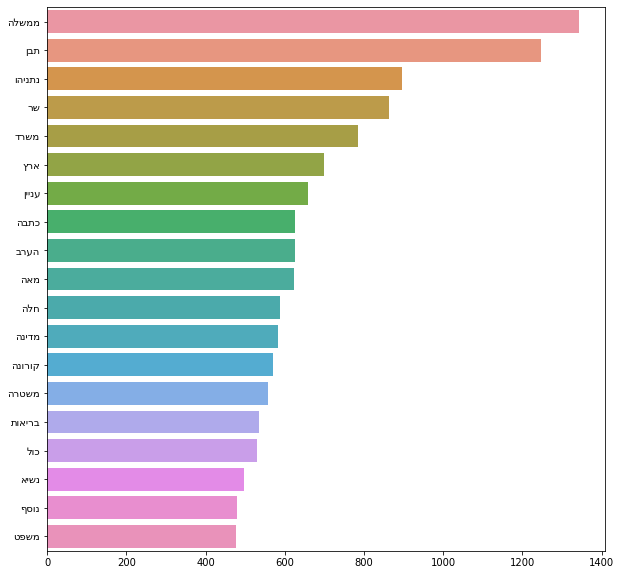

In [11]:
most_common = plot_top_non_stopwords_barchart(lemmatized_text, list(stop) + ["_"])

In [12]:
for element in most_common[:40]:
    print(element)

('ה', 38301)
('_', 34521)
('ב', 19066)
('ל', 10393)
('ו', 7858)
('ש', 5904)
('את', 3788)
('מ', 3142)
('של', 2997)
('על', 2969)
('הוא', 2642)
('כי', 2507)
('כ', 2427)
('ראש', 1732)
('בית', 1441)
('ממשלה', 1342)
('לא', 1325)
('תבן', 1248)
('עם', 1205)
('בן', 1170)
('ישראל', 1122)
('אמר', 984)
('נתניהו', 897)
('שר', 863)
('כך', 805)
('משרד', 784)
('שני', 716)
('ארץ', 698)
('עניין', 658)
('כתבה', 626)
('הערב', 625)
('מאה', 624)
('היה', 623)
('לאחר', 594)
('חלה', 589)
('מדינה', 582)
('שעה', 578)
('שנה', 573)
('בין', 573)
('קורונה', 571)


In [13]:
def remove_stopwords(s, stopwords):
    word_list = s.split()
    output = [w for w in word_list if not w in stopwords]
    return " ".join(output)

In [14]:
# CUSTOM_STOPWORDS = [word[0] for word in most_common if word[0] not in (list(stop) + ["_"])][:50]
CUSTOM_STOPWORDS = ["_", "תבן"]

In [15]:
'ה' in stop

True

In [16]:
CUSTOM_STOPWORDS

['_', 'תבן']

In [17]:
df.loc[:, "lemmatized_text"] = df.lemmatized_text.apply(lambda x: remove_stopwords(x, CUSTOM_STOPWORDS + list(stop)))

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [18]:
lemmatized_text = df["lemmatized_text"]

In [19]:
lemmatized_text[0]

'תם שימוע ממשלה ינימין נתניהו עשר דיון תיק אלף תיק תינה נחתם ארבעה שימוע כעת יועץ משפטי ממשלה אביחי מנדלבליט החליט הגיש כתב אישום ארבעה תיק יובל אראל מציין עורך דין הגיש סיכום כתוב סוכה הזכיר משנה פרקליט מדינה ליאת ארי נעדר שימוע אחרון בשל חופשה משפחתי'

# Tokenization

In [20]:
text_data = df.lemmatized_text.values.tolist()
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

data_words = list(sent_to_words(text_data))

# Bigrams and Trigrams

In [21]:
bigram = gensim.models.Phrases(data_words, min_count=50, threshold=100)
bigram_mod = bigram.freeze()
trigram = gensim.models.Phrases(bigram[data_words], min_count=50, threshold=200)
trigram_mode = trigram.freeze()

In [22]:
from tqdm import tqdm
def make_bigrams(texts):
    return [bigram[doc] for doc in tqdm(texts)]

def make_trigrams(texts):
    return [trigram[bigram_mod[doc]] for doc in tqdm(texts)]

In [23]:
bigram_data_words = make_bigrams(data_words)

100%|██████████| 4742/4742 [00:00<00:00, 16545.83it/s]


In [24]:
trigram_data_words = make_trigrams(bigram_data_words)

100%|██████████| 4742/4742 [00:00<00:00, 12148.94it/s]


In [25]:
stop_grams = ["גלי_צהל", "בגלי_צהל"]

def remove_stopgrams(texts, stop_grams):
    return [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stop_grams] for doc in tqdm(texts)]

In [26]:
processed_data = remove_stopgrams(trigram_data_words, stop_grams)

100%|██████████| 4742/4742 [00:00<00:00, 20074.76it/s]


In [27]:
bigram.export_phrases()

{'יועץ_משפטי': 227.46482258024963,
 'כתב_אישום': 122.44817046546154,
 'יובל_אראל': 227.13262873490146,
 'עורך_דין': 238.33886765408508,
 'מגן_דוד': 265.2373788514393,
 'דוד_אדום': 234.21013525887557,
 'ארץ_ברית': 130.940911553348,
 'אורן_פדידה': 101.56120527306967,
 'דורון_קדוש': 439.74433540193394,
 'באר_שבע': 102.13825757575758,
 'צוות_מגן': 132.03584866759445,
 'אייר_מרציאנו': 192.14916462034762,
 'דונלד_טראמפ': 118.20054794520547,
 'ליה_ספילקין': 488.8079387404282,
 'מאיר_מרציאנו': 162.19248120300753,
 'משא_מתן': 322.65213675213676,
 'הדס_טייף': 258.8483011241632,
 'יובל_שגב': 256.274173553719,
 'רצועה_עז': 128.2095845845846,
 'צחי_דבוש': 385.3300159489633,
 'קוב_מנדל': 399.84430027803523,
 'צבאי_צחי': 158.19770305797704,
 'חיל_אוויר': 110.62358974358975,
 'מוריה_אסרף': 323.35842771485676,
 'יניר_קוזין': 228.37447065940714,
 'אסרף_ולברג': 249.91923204237008,
 'מדיני_מוריה': 110.32655670630355}

# Create dictionary and Corpus

In [28]:
import gensim.corpora as corpora

In [29]:
id2word = corpora.Dictionary(processed_data)

In [30]:
len(id2word)

10737

In [31]:
texts = processed_data
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 3), (33, 1), (34, 3), (35, 1)]


# Building LDA model

In [32]:
lda_model = gensim.models.LdaMulticore(corpus, 
                                   num_topics = 20, 
                                   id2word = id2word,                                    
                                   passes = 10,
                                   workers = 2, random_state=100)

In [33]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.015*"חינוך" + 0.013*"שר" + 0.013*"משרד" + 0.008*"תלמיד" + 0.008*"ממשלה" + '
  '0.008*"עניין" + 0.007*"קורונה" + 0.007*"בריאות" + 0.007*"פתיחה" + '
  '0.006*"איש"'),
 (1,
  '0.028*"קורונה" + 0.024*"בריאות" + 0.023*"מאה" + 0.017*"משרד" + 0.015*"אלף" '
  '+ 0.015*"נגיף" + 0.014*"חלה" + 0.010*"עניין" + 0.010*"עלה" + 0.009*"נדבק"'),
 (2,
  '0.027*"חלה" + 0.022*"נפצע" + 0.019*"תאונה" + 0.016*"פינה" + 0.014*"רכב" + '
  '0.013*"בינוני" + 0.012*"כש" + 0.011*"גבר" + 0.009*"כביש" + 0.008*"פצוע"'),
 (3,
  '0.012*"מאה" + 0.010*"חודש" + 0.008*"אלף" + 0.007*"קורונה" + 0.007*"לראשונה" '
  '+ 0.007*"דיווח" + 0.006*"מדינה" + 0.006*"משרד" + 0.005*"כתבה" + '
  '0.005*"שלושה"'),
 (4,
  '0.031*"משטרה" + 0.022*"חשד" + 0.020*"חשוד" + 0.014*"חקירה" + 0.013*"נעצר" + '
  '0.012*"רצח" + 0.012*"ערבי" + 0.011*"מעצר" + 0.011*"אירוע" + '
  '0.011*"ירושלים"'),
 (5,
  '0.008*"צה" + 0.008*"חיסון" + 0.007*"עניין" + 0.007*"ממשלה" + 0.006*"משרד" + '
  '0.006*"אח" + 0.006*"שר" + 0.006*"לראשונה" + 0.005*"מדינה" + '

In [34]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.177561554642416

Coherence Score:  0.4701675439335803


In [35]:
import pyLDAvis
import pyLDAvis.gensim

In [36]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, sort_topics=False)
vis

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.065238 -0.089249       1        1   4.363772
1     -0.064004 -0.195661       2        1   6.955381
2      0.228668 -0.103223       3        1   5.884637
3     -0.010405 -0.039948       4        1   3.290389
4      0.191209 -0.046088       5        1   7.110567
5     -0.071267  0.001646       6        1   3.105998
6     -0.010732  0.016104       7        1   3.232078
7     -0.071403 -0.083487       8        1   6.354753
8     -0.131106  0.029877       9        1   3.140498
9     -0.068333  0.035537      10        1   3.897073
10    -0.106956  0.126076      11        1  20.011468
11     0.059737  0.113088      12        1   3.220490
12     0.099244  0.071505      13        1   2.673272
13    -0.023039 -0.030961      14        1   4.229605
14    -0.035679  0.053561      15        1   3.017650
15     0.067468  0.034936      16        1   2.226205
16    -0.004538  0.181631      17        1   4.173036
17     0.192473  0.014435      18        1   6.597614
18    -0.122137 -0.088068      19        1   3.691172
19    -0.053962 -0.001711      20        1   2.824341, topic_info=       Term         Freq        Total Category  logprob  loglift
19    ממשלה  1398.000000  1398.000000  Default  30.0000  30.0000
142    נשיא   428.000000   428.000000  Default  29.0000  29.0000
308   משטרה   607.000000   607.000000  Default  28.0000  28.0000
26   נתניהו   872.000000   872.000000  Default  27.0000  27.0000
859   חינוך   426.000000   426.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
383   שמונה    18.374619   227.005044  Topic20  -5.4424   1.0529
994     ארץ    18.482138   268.242594  Topic20  -5.4365   0.8918
395  ישראלי    18.284162   356.526241  Topic20  -5.4473   0.5965
289  ביטחון    17.833560   383.966539  Topic20  -5.4722   0.4974
187     מאה    17.326612   620.980030  Topic20  -5.5011  -0.0122

[1525 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
10633     16  0.880427  anabtawi
5133       5  0.791848       dna
6398       3  0.909606   אבוקסיס
6086       4  0.690446     אביטן
645        5  0.817587       אבן
...      ...       ...       ...
1183       4  0.146677     תשלום
1183       8  0.528038     תשלום
1183      11  0.088006     תשלום
1183      19  0.146677     תשלום
9026       8  0.758836       תשפ

[4955 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [37]:
from tqdm import tqdm 

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = gensim.models.LdaMulticore(corpus, 
                                   num_topics = num_topics, 
                                   id2word = id2word,                                    
                                   passes = 10,
                                   workers = 2, random_state=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=processed_data, start=2, limit=40, step=6)


/opt/anaconda3/envs/hebnlp_project/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
 86%|████████▌ | 6/7 [01:45<00:17, 17.52s/it]

In [ ]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [ ]:
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=text_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=text_data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

In [ ]:
print(sent_topics_sorteddf_mallet.loc[1, "Keywords"])
print(sent_topics_sorteddf_mallet.loc[1, "Text"])

In [ ]:
df_dominant_topic[(df_dominant_topic.Dominant_Topic == 0.0) & (df_dominant_topic.Topic_Perc_Contrib > 0.8)].Text.to_list()

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word, sort_topics=False)
vis

In [ ]:
optimal_model.save("/Users/sapir/PycharmProjects/hebnlp_project/models/optimal_model")